In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import DenseNet121

# Preparing The Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Give dataset path
train_path = '/content/drive/MyDrive/ResearchPaper/traffic_sign_classification_dataset/train'
test_path = '/content/drive/MyDrive/ResearchPaper/traffic_sign_classification_dataset/test'

Working with 36 images
Image examples: 
05017.jpg


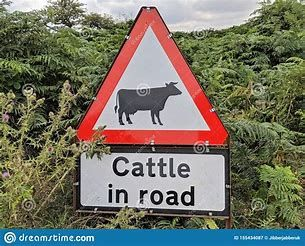

05030.jpg


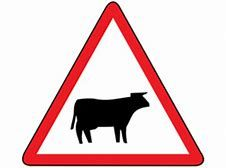

05023.jpg


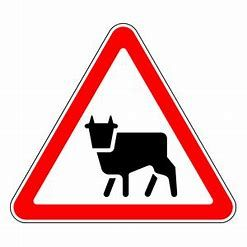

05006.jpg


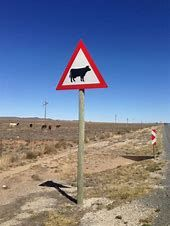

05019.jpg


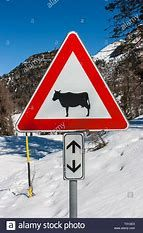

05014.jpg


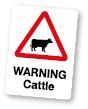

05022.jpg


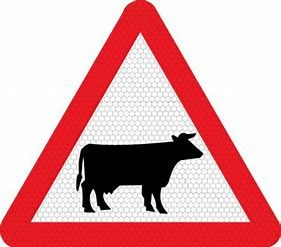

05032.jpg


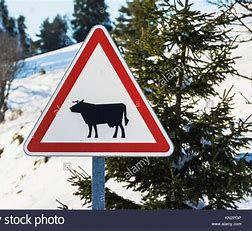

05016.jpg


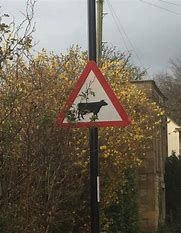

05033.jpg


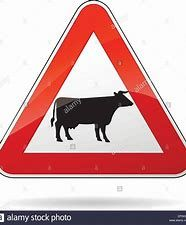

In [8]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/CATTLE'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))


In [9]:
data_dir="/content/drive/MyDrive/ResearchPaper/traffic_sign_classification_dataset"

In [11]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3277 files belonging to 2 classes.
Using 2950 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3277 files belonging to 2 classes.
Using 983 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['test', 'train']


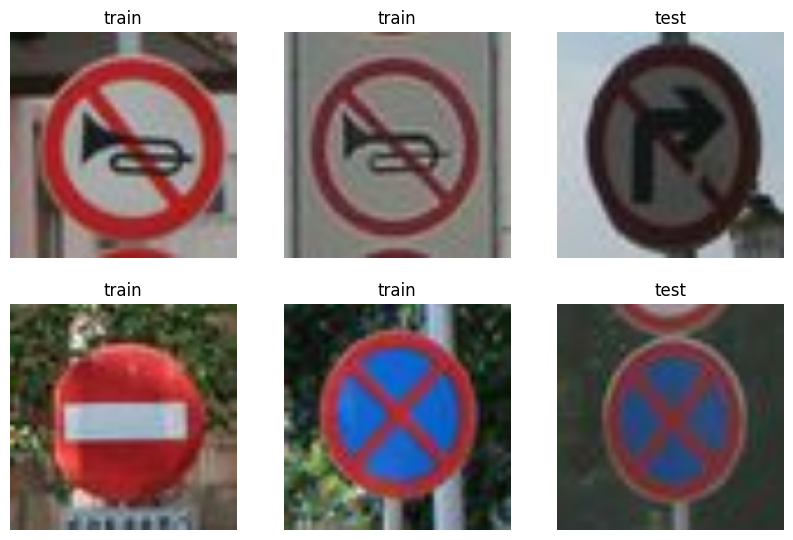

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [24]:
densenet_model = Sequential()

pretrained_model = DenseNet121(
    include_top=False,
    input_shape=(180, 180, 3),
    pooling='avg',
    weights='imagenet'
)

for layer in pretrained_model.layers:
        layer.trainable=False

# Add the pretrained model to your new model
densenet_model.add(pretrained_model)

# Add additional layers
densenet_model.add(Flatten())
densenet_model.add(Dense(1536, activation='relu'))
densenet_model.add(Dense(85, activation='softmax'))

# Compile the model with an optimizer, loss function, and metrics
densenet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
densenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1536)              1574400   
                                                                 
 dense_3 (Dense)             (None, 85)                130645    
                                                                 
Total params: 8742549 (33.35 MB)
Trainable params: 1705045 (6.50 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [26]:
densenet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
epochs=30
history = densenet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
93/93 [==============================] - 39s 401ms/step - loss: 0.4046 - accuracy: 0.8119 - val_loss: 0.4410 - val_accuracy: 0.8230
Epoch 2/30
93/93 [==============================] - 39s 402ms/step - loss: 0.3898 - accuracy: 0.8186 - val_loss: 0.4687 - val_accuracy: 0.8016
Epoch 3/30
93/93 [==============================] - 49s 514ms/step - loss: 0.3740 - accuracy: 0.8247 - val_loss: 0.4624 - val_accuracy: 0.7955
Epoch 4/30
93/93 [==============================] - 39s 395ms/step - loss: 0.3648 - accuracy: 0.8278 - val_loss: 0.4352 - val_accuracy: 0.8179
Epoch 5/30
93/93 [==============================] - 39s 400ms/step - loss: 0.3567 - accuracy: 0.8369 - val_loss: 0.4462 - val_accuracy: 0.8169
Epoch 6/30
93/93 [==============================] - 48s 504ms/step - loss: 0.3373 - accuracy: 0.8451 - val_loss: 0.4769 - val_accuracy: 0.8006
Epoch 7/30
93/93 [==============================] - 48s 494ms/step - loss: 0.3470 - accuracy: 0.8414 - val_loss: 0.5130 - val_accuracy: 0.7691

# Evaluating The Model

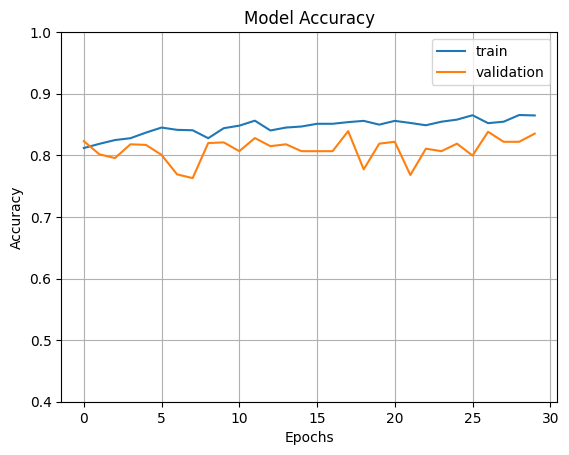

In [33]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

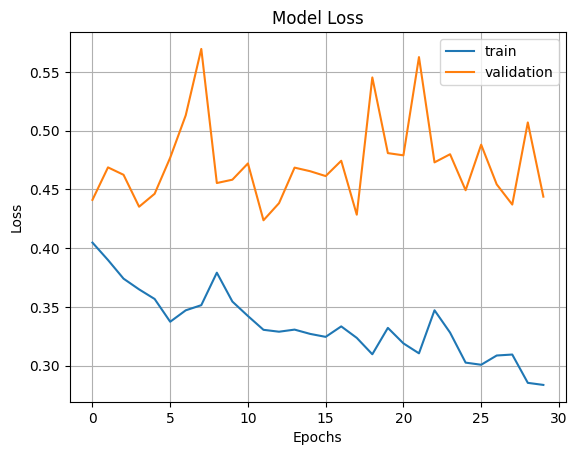

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# 1. Training accuracy and testing accuracy
train_accuracy = history.history['accuracy'][-1]
test_loss, test_accuracy = densenet_model.evaluate(val_ds)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

 7/31 [=====>........................] - ETA: 8s - loss: 0.2240 - accuracy: 0.8884

In [22]:
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = densenet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())


1/1 [==============================] - 2s 2s/step


In [23]:
report = classification_report(y_true, y_pred, target_names=class_names)
confusion = confusion_matrix(y_true, y_pred)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Classification Report:
               precision    recall  f1-score   support

        test       0.72      0.73      0.72       367
       train       0.84      0.83      0.83       616

    accuracy                           0.79       983
   macro avg       0.78      0.78      0.78       983
weighted avg       0.79      0.79      0.79       983

Confusion Matrix:
 [[267 100]
 [106 510]]


In [ ]:
##TRIAL

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the validation dataset and collect predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = resnet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 0s 27ms/step
Confusion Matrix:
[[288  79]
 [ 54 562]]


1/1 [==============================] - 0s 28ms/step


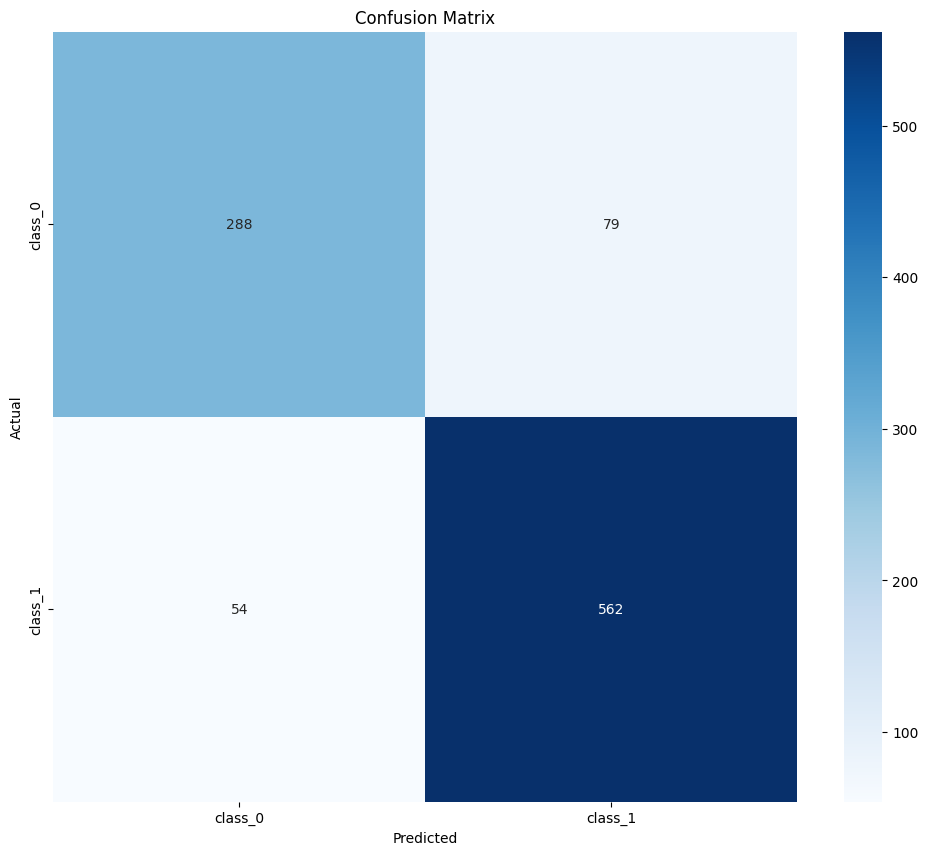

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Evaluate the model on the validation dataset and collect predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = resnet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Define class labels (assuming your classes are named as class_0, class_1, ..., class_84)
class_labels = [f"class_{i}" for i in range(85)]

# Plot the confusion matrix with labels
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
